## Orlando Python User Group

## Data Binning Techinques

### Speaker: Ricardo J. Serrano
### Source: https://www.analyticsvidhya.com/blog/2020/09/pandas-speed-up-preprocessing/

### Objective

*  Explore Pandas techinques of data binning

#### What is data binning?

*  Also called *discrete binning* or *bucketing*, is a data pre-processing technique used to reduce the effects of minor observation errors.

*  Converts continuous feature to categorical ones.

*  Useful for dealing with extreme values (outliers) without removing them.

Source: https://en.wikipedia.org/wiki/Data_binning

#### Dataset

*  Kaggle - Expedia (https://www.kaggle.com/c/expedia-personalized-sort/data?select=data.zip)

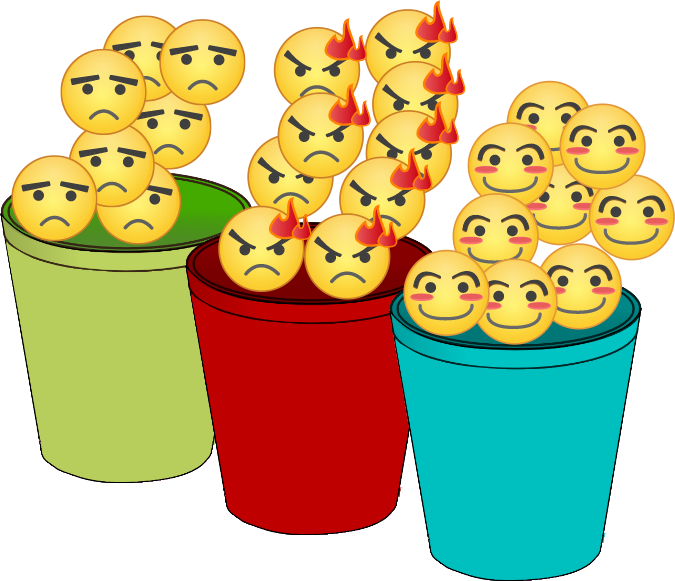

Source: [Numerical Python Course](https://www.python-course.eu/pandas_python_binning.php)

<center><img src="binning.png" width="600" height="600"></center>

Source: [Numerical Python Course](https://www.python-course.eu/pandas_python_binning.php)

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.rcParams['figure.figsize'] = [12,10]

In [2]:
# read dataset
data = pd.read_csv("train.csv")

In [3]:
data.shape

(9917530, 54)

In [4]:
data.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9917530 entries, 0 to 9917529
Data columns (total 54 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   srch_id                      int64  
 1   date_time                    object 
 2   site_id                      int64  
 3   visitor_location_country_id  int64  
 4   visitor_hist_starrating      float64
 5   visitor_hist_adr_usd         float64
 6   prop_country_id              int64  
 7   prop_id                      int64  
 8   prop_starrating              int64  
 9   prop_review_score            float64
 10  prop_brand_bool              int64  
 11  prop_location_score1         float64
 12  prop_location_score2         float64
 13  prop_log_historical_price    float64
 14  position                     int64  
 15  price_usd                    float64
 16  promotion_flag               int64  
 17  srch_destination_id          int64  
 18  srch_length_of_stay          int64  
 19  

In [6]:
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,...,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,NaN,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,NaN,0


In [7]:
# randomly select 20% percent of rows
data_2 = data.sample(frac=0.2, random_state=42)

In [8]:
data_2.shape

(1983506, 54)

In [9]:
data_2.gross_bookings_usd.describe()

count     55035.000000
mean        392.933784
std        1186.576313
min           0.000000
25%         123.625000
50%         217.660000
75%         428.370000
max      167740.590000
Name: gross_bookings_usd, dtype: float64

<AxesSubplot:>

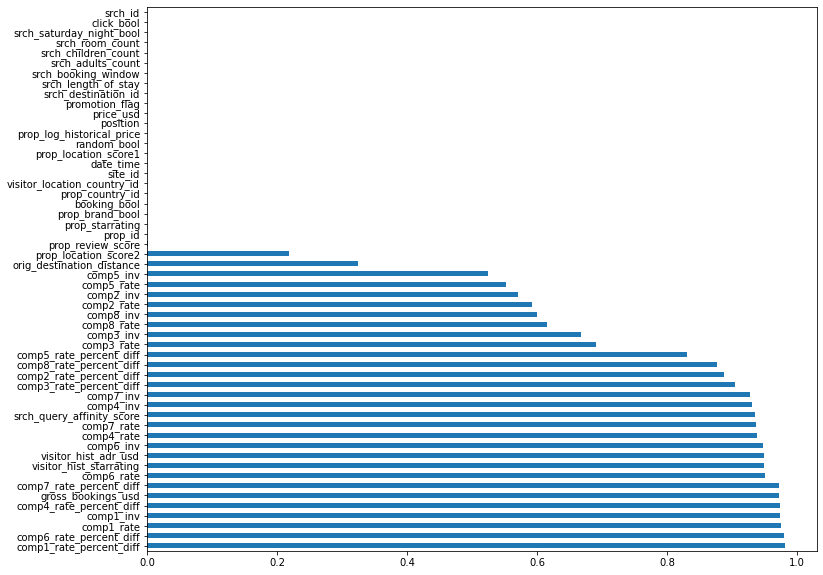

In [10]:
# verify missing values
data_2.isnull().mean().sort_values(ascending=False).plot(kind='barh')

In [11]:
# exclude missing values in 'gross_bookings_usd'
data_2.dropna(subset=['gross_bookings_usd'], inplace=True)
data_2.reset_index()

,index,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,...,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,gross_bookings_usd,booking_bool
0,9382755,629893,2013-03-20 18:59:57,5,219,NaN,NaN,219,27690,4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,868.62,1
1,8153400,547738,2012-11-16 11:03:52,31,219,NaN,NaN,219,130305,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,80.58,1
2,5452848,365920,2013-06-14 09:26:55,24,216,NaN,NaN,225,26458,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,140.15,1
3,3642713,244719,2013-04-03 16:33:13,5,219,NaN,NaN,219,104871,2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,300.84,1
4,6578842,441765,2013-03-14 22:05:22,5,219,NaN,NaN,219,137592,3,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,505.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55030,5755665,386255,2013-02-14 12:02:21,5,219,NaN,NaN,219,132332,2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,1,251.40,1
55031,7409491,497954,2013-02-03 11:15:05,9,59,NaN,NaN,59,68259,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,69.73,1
55032,9257852,621476,2013-03-18 07:44:17,5,15,NaN,NaN,219,58255,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2828.77,1
55033,6095514,409126,2013-03-05 09:40:05,5,219,NaN,NaN,219,88312,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,208.32,1


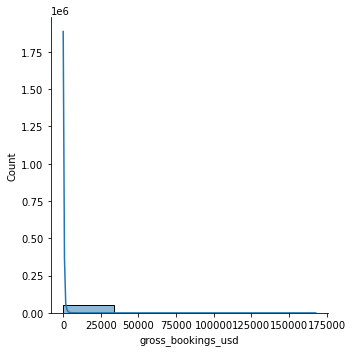

In [12]:
sns.displot(data_2['gross_bookings_usd'], bins=5, kde=True)

<AxesSubplot:xlabel='gross_bookings_usd'>

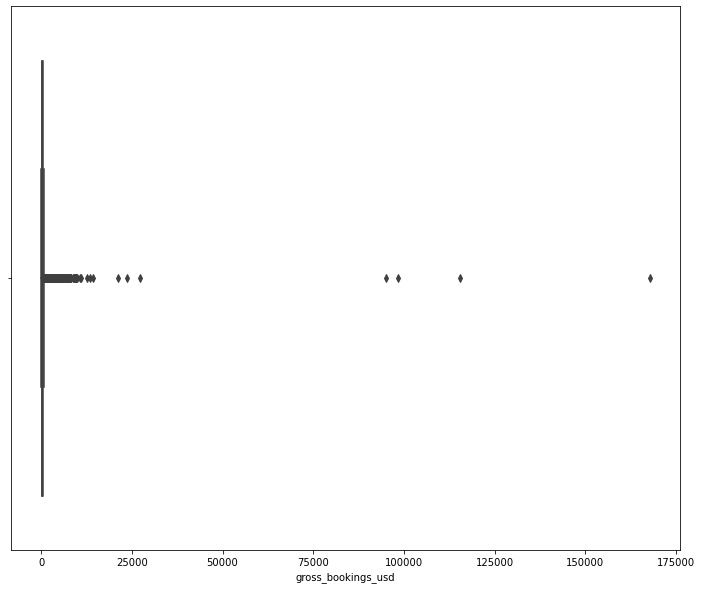

In [13]:
sns.boxplot(x='gross_bookings_usd', data=data_2)

We want to create a new feature/variable to convert `gross_booking_usd` from numerical to categorical. The way to accomplish this is to bin the values of the selected feature into predefined buckets.

### Method #1 - Define a function

In [14]:
pd.qcut(data_2['gross_bookings_usd'], 4)

9382755    (428.37, 167740.59]
8153400      (-0.001, 123.625]
5452848      (123.625, 217.66]
3642713       (217.66, 428.37]
6578842    (428.37, 167740.59]
                  ...         
5755665       (217.66, 428.37]
7409491      (-0.001, 123.625]
9257852    (428.37, 167740.59]
6095514      (123.625, 217.66]
3877611      (-0.001, 123.625]
Name: gross_bookings_usd, Length: 55035, dtype: category
Categories (4, interval[float64]): [(-0.001, 123.625] < (123.625, 217.66] < (217.66, 428.37] < (428.37, 167740.59]]

In [15]:
def apply_bins(bins): 
    if 0 <= bins < 124:
        category = 'Less than 124'
    elif 124 <= bins < 218:
        category = 'Between 124 and 218'
    elif 218 <= bins < 429:
        category = 'Between 218 and 429'
    else:
        category = '>429'
    return category

In [16]:
%%timeit
cat_list = []
for i in range(len(data_2)):
    bns = data_2.iloc[i]['gross_bookings_usd']
    cat = apply_bins(bns)
    cat_list.append(cat)
data_2['Bin_Categories'] = cat_list

14.5 s ± 1.69 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [17]:
data_2[['gross_bookings_usd', 'Bin_Categories']].head(10)

,gross_bookings_usd,Bin_Categories
9382755,868.62,>429
8153400,80.58,Less than 124
5452848,140.15,Between 124 and 218
3642713,300.84,Between 218 and 429
6578842,505.01,>429
8972193,162.80,Between 124 and 218
3025790,132.73,Between 124 and 218
5626098,1973.12,>429
7742572,291.08,Between 218 and 429
4382112,320.52,Between 218 and 429


### Method #2 - iterrows()

iterrows() is a generator that iterates over the rows of the dataframe and returns the index of each row, in addition to an object containing the row itself.

In [18]:
%%timeit
cat_list = []
for index, row in data_2.iterrows():
    bns = row['gross_bookings_usd']    
    cat = apply_bins(bns)
    cat_list.append(cat)
#print(len(cat_list))
data_2['Bin_Categories_iter'] = cat_list

6.79 s ± 239 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
data_2[['gross_bookings_usd', 'Bin_Categories', 'Bin_Categories_iter']].head(10)

,gross_bookings_usd,Bin_Categories,Bin_Categories_iter
9382755,868.62,>429,>429
8153400,80.58,Less than 124,Less than 124
5452848,140.15,Between 124 and 218,Between 124 and 218
3642713,300.84,Between 218 and 429,Between 218 and 429
6578842,505.01,>429,>429
8972193,162.80,Between 124 and 218,Between 124 and 218
3025790,132.73,Between 124 and 218,Between 124 and 218
5626098,1973.12,>429,>429
7742572,291.08,Between 218 and 429,Between 218 and 429
4382112,320.52,Between 218 and 429,Between 218 and 429


### Method #3 - apply()

The apply() method allows applying a given function along a specific axis (0 for rows, and 1 for columns). Internally, apply() also uses for loops, but with a lot of optimizations, which we won’t get into here.

In [20]:
%%timeit
data_2['Bins_cat_apply'] = data_2.apply(lambda row: apply_bins(row['gross_bookings_usd']), axis=1)

905 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [21]:
data_2[['gross_bookings_usd', 'Bin_Categories', 'Bin_Categories_iter', 'Bins_cat_apply']].head(10)

,gross_bookings_usd,Bin_Categories,Bin_Categories_iter,Bins_cat_apply
9382755,868.62,>429,>429,>429
8153400,80.58,Less than 124,Less than 124,Less than 124
5452848,140.15,Between 124 and 218,Between 124 and 218,Between 124 and 218
3642713,300.84,Between 218 and 429,Between 218 and 429,Between 218 and 429
6578842,505.01,>429,>429,>429
8972193,162.80,Between 124 and 218,Between 124 and 218,Between 124 and 218
3025790,132.73,Between 124 and 218,Between 124 and 218,Between 124 and 218
5626098,1973.12,>429,>429,>429
7742572,291.08,Between 218 and 429,Between 218 and 429,Between 218 and 429
4382112,320.52,Between 218 and 429,Between 218 and 429,Between 218 and 429


### Method #4 - cut()

We use the cut() function of the Pandas library to perform this preprocessing task, and thus, automatically binning our data.

In [22]:
%%timeit
data_2['Bin_cat_cut'] = pd.cut(np.array(data_2['gross_bookings_usd']), 
                               bins=[0, 124, 218, 429, data_2['gross_bookings_usd'].max()], 
                               labels=["Less than 124", "Between 123 and 218", 
                                       "Between 218 and 429", ">429"])

3.6 ms ± 27.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [23]:
data_2[['gross_bookings_usd', 'Bin_Categories', 'Bin_Categories_iter', 'Bins_cat_apply', 'Bin_cat_cut']].head(10)

,gross_bookings_usd,Bin_Categories,Bin_Categories_iter,Bins_cat_apply,Bin_cat_cut
9382755,868.62,>429,>429,>429,>429
8153400,80.58,Less than 124,Less than 124,Less than 124,Less than 124
5452848,140.15,Between 124 and 218,Between 124 and 218,Between 124 and 218,Between 123 and 218
3642713,300.84,Between 218 and 429,Between 218 and 429,Between 218 and 429,Between 218 and 429
6578842,505.01,>429,>429,>429,>429
8972193,162.80,Between 124 and 218,Between 124 and 218,Between 124 and 218,Between 123 and 218
3025790,132.73,Between 124 and 218,Between 124 and 218,Between 124 and 218,Between 123 and 218
5626098,1973.12,>429,>429,>429,>429
7742572,291.08,Between 218 and 429,Between 218 and 429,Between 218 and 429,Between 218 and 429
4382112,320.52,Between 218 and 429,Between 218 and 429,Between 218 and 429,Between 218 and 429
